In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [32]:
team_index_map = {
    'ANA': 0, 'BOS': 1, 'BUF': 2, 'CGY': 3, 'CAR': 4,'CHI': 5, 
    'COL': 6,'CBJ': 7,  'DAL': 8, 'DET': 9, 'EDM': 10, 'FLA': 11, 'LAK': 12, 'MIN': 13, 'MTL': 14,
     'NSH': 15,'NJD': 16, 'NYI': 17, 'NYR': 18, 'OTT': 19, 'PHI': 20, 'PIT': 21,'SJS': 22, 'SEA': 23,
     'STL': 24, 'TBL': 25, 'TOR': 26,'UTA':27, 'VAN': 28, 'VGK': 29, 'WSH': 30, 'WPG': 31
}

In [33]:
df_priors_saved = pd.read_csv("D:/NHL/data/2024/priors_saved.csv")

In [34]:
df_priors_saved.head()

,date,off_5v5_mu,def_5v5_mu,off_spec_mu,def_spec_mu
0,2024-10-04,"[-0.18, -0.01, -0.01, -0.04, 0.07, -0.175, 0.1...","[-0.07, 0.02, -0.11, -0.07, 0.109, -0.07, -0.0...","[-0.08, 0.035, -0.06, -0.06, 0.06, -0.13, 0.15...","[-0.3, 0.09, -0.02, 0.0, 0.11, 0.02, -0.008, -..."
1,2024-10-05,"[-0.17084785378778417, -0.0015875534299980162,...","[-0.07233311810927494, 0.017269146372741604, -...","[-0.07415259133303635, 0.04184985568148465, -0...","[-0.30546887890552743, 0.0834029536475996, -0...."
2,2024-10-06,"[-0.16854623524908094, -0.00044118114054494457...","[-0.07180708640903986, 0.01568471738441191, -0...","[-0.07356973752671095, 0.04176708492924721, -0...","[-0.30454024800360385, 0.08477206634006906, -0..."
3,2024-10-07,"[-0.16854623524908094, -0.00044118114054494457...","[-0.07180708640903986, 0.01568471738441191, -0...","[-0.07356973752671095, 0.04176708492924721, -0...","[-0.30454024800360385, 0.08477206634006906, -0..."
4,2024-10-08,"[-0.16854623524908094, -0.00044118114054494457...","[-0.07180708640903986, 0.01568471738441191, -0...","[-0.07356973752671095, 0.04176708492924721, -0...","[-0.30454024800360385, 0.08477206634006906, -0..."


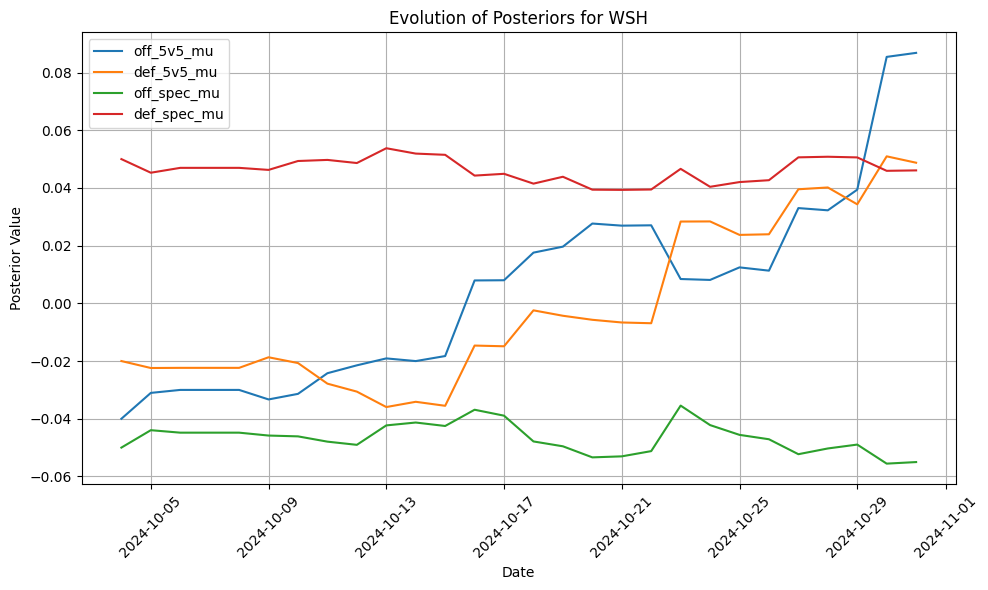

In [52]:
team = 'WSH'
team_idx = team_index_map[team]

# Convert the posterior columns to lists (if not already done)
for col in ['off_5v5_mu', 'def_5v5_mu', 'off_spec_mu', 'def_spec_mu']:
    df_priors_saved[col] = df_priors_saved[col].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Extract the posterior values for the selected team across all dates
df_team = pd.DataFrame({
    'date': df_priors_saved['date'],
    'off_5v5_mu': df_priors_saved['off_5v5_mu'].apply(lambda x: x[team_idx]),
    'def_5v5_mu': df_priors_saved['def_5v5_mu'].apply(lambda x: x[team_idx]),
    'off_spec_mu': df_priors_saved['off_spec_mu'].apply(lambda x: x[team_idx]),
    'def_spec_mu': df_priors_saved['def_spec_mu'].apply(lambda x: x[team_idx])
})

# Convert 'date' to datetime format
df_team['date'] = pd.to_datetime(df_team['date'])

# Plotting the evolution of posteriors over time
plt.figure(figsize=(10, 6))
plt.plot(df_team['date'], df_team['off_5v5_mu'], label='off_5v5_mu')
plt.plot(df_team['date'], df_team['def_5v5_mu'], label='def_5v5_mu')
plt.plot(df_team['date'], df_team['off_spec_mu'], label='off_spec_mu')
plt.plot(df_team['date'], df_team['def_spec_mu'], label='def_spec_mu')

plt.title(f'Evolution of Posteriors for {team}')
plt.xlabel('Date')
plt.ylabel('Posterior Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
with open('D:/NHL/data/2024/goalies_dict_archive.pkl', 'rb') as f:
    goalies_dict_archive = pickle.load(f)


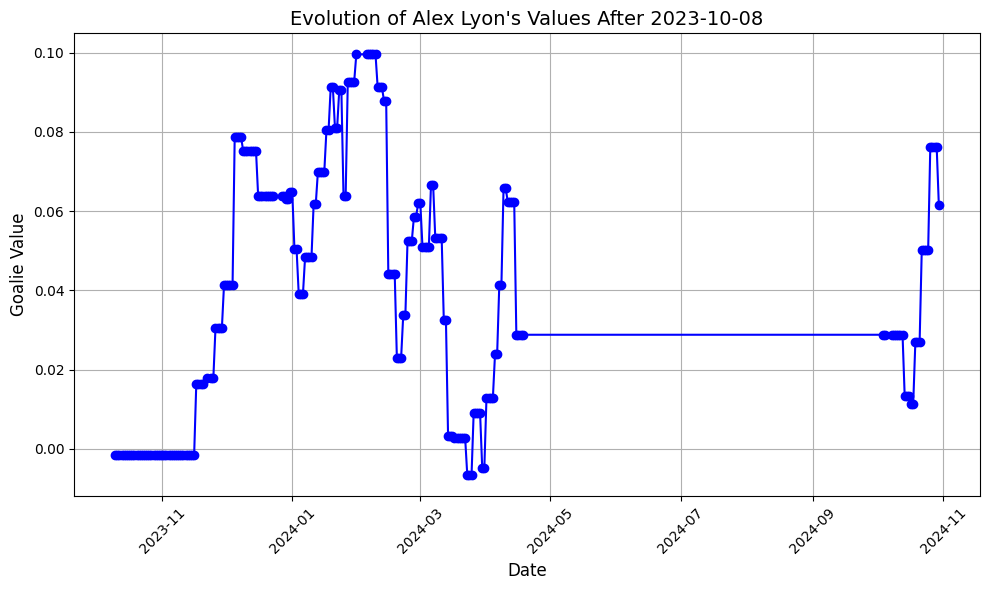

In [41]:
goalie_name = 'Alex Lyon'  # Replace with the goalie of interest
start_date = pd.to_datetime('2023-10-08')

# Prepare data for plotting: extract dates and values for the specific goalie after the start date
goalie_dates = []
goalie_values = []

for date_str, goalies in goalies_dict_archive.items():
    date = pd.to_datetime(date_str)
    
    # Only consider dates after October 8, 2023
    if date > start_date and goalie_name in goalies:
        goalie_dates.append(date)
        goalie_values.append(goalies[goalie_name])

# Sort the data by date
sorted_data = sorted(zip(goalie_dates, goalie_values))
goalie_dates, goalie_values = zip(*sorted_data)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(goalie_dates, goalie_values, marker='o', linestyle='-', color='b')
plt.title(f'Evolution of {goalie_name}\'s Values After {start_date.date()}', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Goalie Value', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [173]:
goalie_dates

(Timestamp('2023-10-10 00:00:00'),
 Timestamp('2023-10-11 00:00:00'),
 Timestamp('2023-10-12 00:00:00'),
 Timestamp('2023-10-13 00:00:00'),
 Timestamp('2023-10-14 00:00:00'),
 Timestamp('2023-10-15 00:00:00'),
 Timestamp('2023-10-16 00:00:00'),
 Timestamp('2023-10-17 00:00:00'),
 Timestamp('2023-10-18 00:00:00'),
 Timestamp('2023-10-19 00:00:00'),
 Timestamp('2023-10-20 00:00:00'),
 Timestamp('2023-10-21 00:00:00'),
 Timestamp('2023-10-22 00:00:00'),
 Timestamp('2023-10-23 00:00:00'),
 Timestamp('2023-10-24 00:00:00'),
 Timestamp('2023-10-25 00:00:00'),
 Timestamp('2023-10-26 00:00:00'),
 Timestamp('2023-10-27 00:00:00'),
 Timestamp('2023-10-28 00:00:00'),
 Timestamp('2023-10-29 00:00:00'),
 Timestamp('2023-10-30 00:00:00'),
 Timestamp('2023-10-31 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-11-02 00:00:00'),
 Timestamp('2023-11-03 00:00:00'),
 Timestamp('2023-11-04 00:00:00'),
 Timestamp('2023-11-05 00:00:00'),
 Timestamp('2023-11-06 00:00:00'),
 Timestamp('2023-11-